# Confidence Interval Examples

## Standard Normal N(0,1)

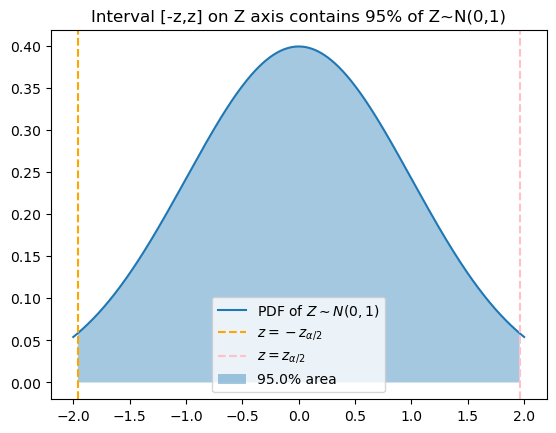

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 1000)
pdf_z = stats.norm.pdf(x)

alpha = 0.05
critical_value = stats.norm.ppf(1-alpha/2)

fig, ax = plt.subplots()
ax.plot(x, pdf_z, label="PDF of $Z \\sim N(0,1)$")
ax.axvline(x=-critical_value, color="orange", linestyle="--", label="$z=-z_{\\alpha/2}$")
ax.axvline(x=critical_value, color="pink", linestyle="--", label="$z=z_{\\alpha/2}$")
ax.fill_between(x, pdf_z, where=(x >= -critical_value) & (x <= critical_value), alpha=0.4, label=f"{(1-alpha)*100}% area" )
ax.set_title("Interval [-z,z] on Z axis contains 95% of Z~N(0,1)")
ax.legend()

# C.I. Example: X~Ber(p) 

Let $X \sim Ber(p)$ and $Z \sim N(0,1)$

Project Interval $[-z_{\alpha/2}, z_{\alpha/2}]$ on Z axis to the interval I on $p$ axis using:

* location of the **sample mean** $\bar{X_n}$
* scale value called **Standard Error**  $\frac{\hat{\sigma}}{\sqrt{n}} = \sqrt{\frac{\bar{X_n} (1 - \bar{X_n})}{n}} $

The Confidence Interval $I$ with level $(1-\alpha)$ is :

$$ 
\begin{eqnarray*}
I & = & \left[ \bar{X_n} - z_{\alpha/2} \cdot \text{SE}, \bar{X_n} + z_{\alpha/2} \cdot \text{SE} \right] \\
& = & \left[ \bar{X_n} - z_{\alpha/2} \cdot \sqrt{\frac{\bar{X_n} (1 - \bar{X_n})}{n}}, \bar{X_n} + z_{\alpha/2} \cdot \sqrt{\frac{\bar{X_n} (1 - \bar{X_n})}{n}} \right]
\end{eqnarray*}
$$


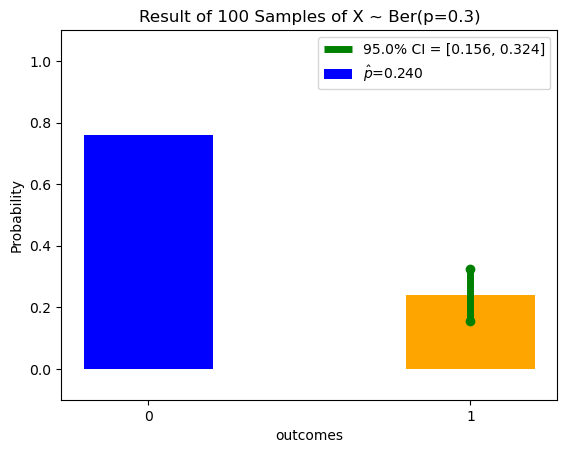

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


n = 100
p = 0.3
outcomes = [0, 1]
probs = [1-p, p]

x = stats.bernoulli.rvs(p, size=n)
se = stats.sem(x)
p_hat = np.mean(x)
alpha = 0.05 # confidence level (1-alpha)
critical_value = stats.norm.ppf(1-alpha/2)

ci = [p_hat - critical_value*se, p_hat + critical_value * se]

fig, ax = plt.subplots()
ax.bar(outcomes, [1-p_hat, p_hat], color=["blue", "orange"], label="$\\hat{p}$=" + f"{p_hat:.3f}", width=0.4)
ax.vlines(1, ci[0], ci[1], color="green", lw=5, label=f"{(1-alpha)*100:.1f}% CI = [{ci[0]:.3f}, {ci[1]:.3f}]")
ax.scatter([1, 1], ci, color="green")
ax.set_title(f"Result of {n} Samples of X ~ Ber(p={p})")
ax.set_xlabel("outcomes")
ax.set_ylabel("Probability")
ax.set_xticks(outcomes)
ax.set_xticklabels([0,1])
ax.set_ylim(-0.1, 1.1)


ax.legend()


## C.I. example: X ~ Normal

Let $X \sim N(\mu, \sigma^2)$ and $Z \sim N(0,1)$. Suppose $\mu, \sigma$ are unknown.

Project Interval $[-z_{\alpha/2}, z_{\alpha/2}]$ on Z axis to the interval I on $X$ axis using:

* location of the **sample mean** $\bar{X_n}$
* scale value called **Standard Error**  $\frac{\hat{\sigma}}{\sqrt{n}} = \sqrt{\frac{\sum_{i=1}^n(X_i - \bar{X_n})^2/(n-1)}{n}} $

The Confidence Interval $I$ with level $(1-\alpha)$ is :

$$ 
\begin{eqnarray*}
I & = & \left[ \bar{X_n} - z_{\alpha/2} \cdot \text{SE}, \bar{X_n} + z_{\alpha/2} \cdot \text{SE} \right] \\
& = & \left[ \bar{X_n} - z_{\alpha/2} \cdot  \sqrt{\frac{\sum_{i=1}^n(X_i - \bar{X_n})^2/(n-1)}{n}}, \bar{X_n} + z_{\alpha/2} \cdot  \sqrt{\frac{\sum_{i=1}^n(X_i - \bar{X_n})^2/(n-1)}{n}}\right]
\end{eqnarray*}
$$

Confidence Interval I is a random interval s.t.:
$$
P(\mu \in \text{Random Interval } I) \geq 1-\alpha
$$


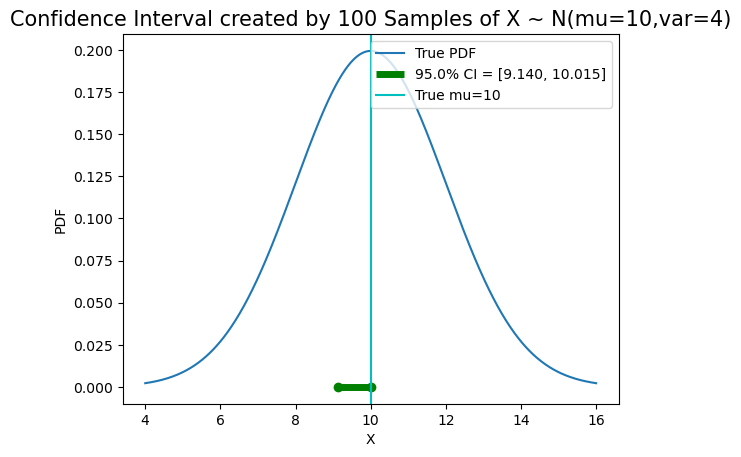

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


n = 100
mu = 10
variance = 4
sigma = np.sqrt(variance)


x = stats.norm.rvs(loc=mu, scale=sigma, size=n)
se = stats.sem(x)
mu_hat = np.mean(x)
alpha = 0.05 # confidence level (1-alpha)
critical_value = stats.norm.ppf(1-alpha/2)

ci = [mu_hat - critical_value*se, mu_hat + critical_value * se]

fig, ax = plt.subplots()
t = np.linspace(mu-3*sigma, mu+3*sigma, 1000)
true_pdf = stats.norm.pdf(t, loc=mu, scale=sigma)
ax.plot(t, true_pdf, label=f"True PDF")
ax.hlines(0, ci[0], ci[1], color="green", lw=5, label=f"{(1-alpha)*100:.1f}% CI = [{ci[0]:.3f}, {ci[1]:.3f}]")
ax.scatter(ci, [0,0] , color="green")
ax.set_title(f"Confidence Interval created by {n} Samples of X ~ N(mu={mu},var={variance})", fontsize=15)
ax.axvline(x=mu, label=f"True mu={mu}", color="c")
ax.set_xlabel("X")
ax.set_ylabel("PDF")
ax.legend(loc="upper right")

In [26]:
def test_ci():
    mu = 10
    variance = 4
    sigma = np.sqrt(variance)
    x = stats.norm.rvs(loc=mu, scale=sigma, size=n)
    se = stats.sem(x)
    mu_hat = np.mean(x)
    alpha = 0.05 # confidence level (1-alpha)
    critical_value = stats.norm.ppf(1-alpha/2)
    ci = [mu_hat - critical_value*se, mu_hat + critical_value * se]
    is_mu_in_ci = mu >= ci[0] and mu <= ci[1]
    
    if is_mu_in_ci:
        print(f"mu={mu} is in [{ci[0]},{ci[1]}]")
    else:
        print(f"mu={mu} is NOT in [{ci[0]},{ci[1]}]")
    return is_mu_in_ci

for i in range(20):
    test_ci()

mu=10 is in [9.728383294624772,10.508833858924591]
mu=10 is in [9.724722042623807,10.570544780806756]
mu=10 is NOT in [10.005161260651239,10.759411910675176]
mu=10 is NOT in [9.211527893318726,9.935086673042223]
mu=10 is in [9.660510960836078,10.470204177203023]
mu=10 is in [9.752552484764866,10.463747381882374]
mu=10 is in [9.59425169664466,10.333454919422953]
mu=10 is in [9.590468978640226,10.452067283374094]
mu=10 is in [9.32760207292557,10.217491441860203]
mu=10 is in [9.869352213153899,10.674858550907022]
mu=10 is in [9.553265453136314,10.36582854631183]
mu=10 is in [9.40390425820133,10.135310510900542]
mu=10 is in [9.642654742564112,10.376824419424842]
mu=10 is in [9.722163950041905,10.484997749203918]
mu=10 is in [9.585460350324807,10.40510449876732]
mu=10 is in [9.825034030961255,10.573498049140476]
mu=10 is in [9.642065568105512,10.468559184454275]
mu=10 is in [9.929531314268313,10.715590683326862]
mu=10 is in [9.585088348030073,10.431038114496786]
mu=10 is in [9.8712009349801

## stats.sem computes SE using unbiased variance

In [4]:
import numpy as np
import scipy.stats as stats

x = np.arange(0,10,1)
n = len(x)
se1 = stats.sem(x)

unbiased_variance = ((x - np.mean(x)) ** 2).sum()/(n-1) 
se2 = np.sqrt(unbiased_variance)/np.sqrt(n)
print(f"Standard Error computed by scipy.stats: {se1}")
print(f"Standard Error computed using my formula: {se2}")

Standard Error computed by scipy.stats: 0.9574271077563381
Standard Error computed using my formula: 0.9574271077563381
